In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

sns.set_style('ticks')

In [7]:
dynData = loadmat('./Dynamcs.mat')

In [31]:
noCtrl = dynData['fcs']
wiCtrl = dynData['fs']
tspan = dynData['tspan'].flatten() / 24

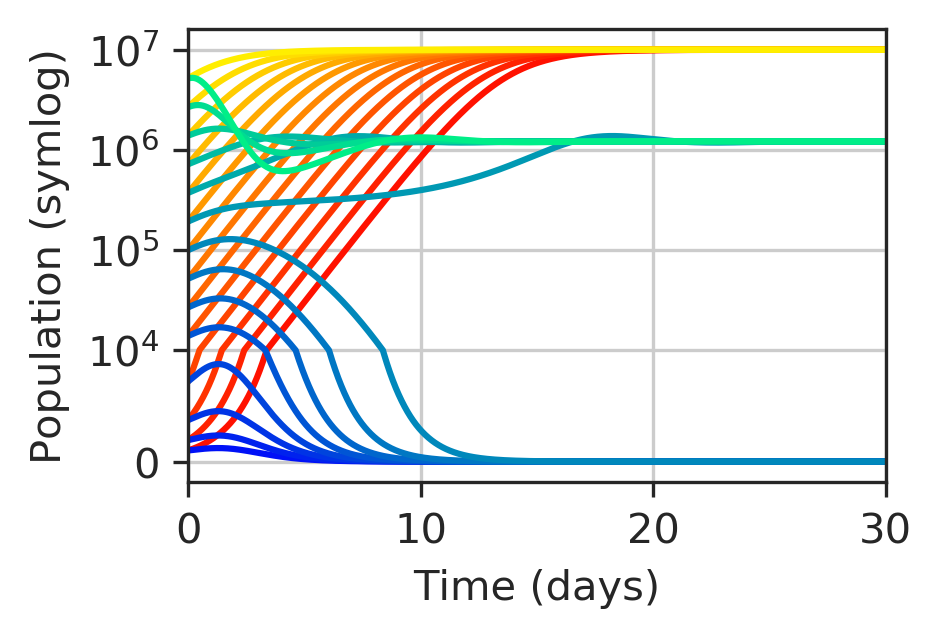

In [53]:
traceN = noCtrl.shape[1]
bPalette = sns.color_palette('winter', traceN)
rPalette = sns.color_palette('autumn', traceN)


fig, ax = plt.subplots(figsize=[3, 2])
fig.dpi = 300

for idx in range(traceN):
    ax.plot(tspan, noCtrl[:, idx], color=rPalette[idx])
    ax.plot(tspan, wiCtrl[:, idx], color=bPalette[idx])

ax.set_yscale('symlog', linthreshy=10000)
ax.set_xlim([0, 30])
ax.set_ylabel('Population (symlog)')
ax.set_xlabel('Time (days)')
ax.grid(True, which='both')

fig.savefig('./ExportedFigs/Dynmaics.svg')

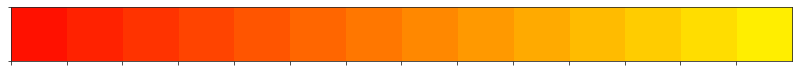

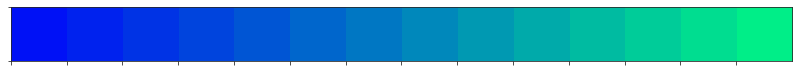

In [78]:
sns.palplot(rPalette)
plt.savefig('./ExportedFigs/DynLgd1.svg')
sns.palplot(bPalette)   
plt.savefig('./ExportedFigs/DynLgd2.svg')

In [76]:
fig

<Figure size 432x288 with 0 Axes>

In [73]:
fig.axes

[]

In [69]:
axs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4df2d2d208>,
      dtype=object)